# SPAM Detection

### Installations and Imports

In [5]:
%pip install numpy pandas tensorflow matplotlib seaborn nltk scikit-learn wordcloud autokeras

# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import autokeras as ak

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\popsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data and make columns uniform

In [6]:
# Load 'lingSpam'
df_ling = pd.read_csv('data\lingSpam.csv')

# Load 'enronSpamSubset'
df_enron = pd.read_csv('data\enronSpamSubset.csv')

# Load 'completeSpamAssassin' 
df_sa = pd.read_csv('data\completeSpamAssassin.csv')

# check columns in dataframes
print(df_ling.columns)
print(df_enron.columns)
print(df_sa.columns)

# remove extra column from enron data
df_enron = df_enron.drop(columns=['Unnamed: 0.1'])


print('Removing exta column...')
print(df_ling.columns)
print(df_enron.columns)
print(df_sa.columns)

df_enron.head()


Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Removing exta column...
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')


,Unnamed: 0,Body,Label
0,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,Subject: are you listed in major search engine...,1
2,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,"Subject: "" bidstogo "" is places to go , things...",1


### Combine datasets

In [7]:
df_combined = pd.concat([df_sa, df_enron, df_ling])
df_combined.drop('Unnamed: 0', axis = 1, inplace=True)
df_combined.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


### Check for data imbalance

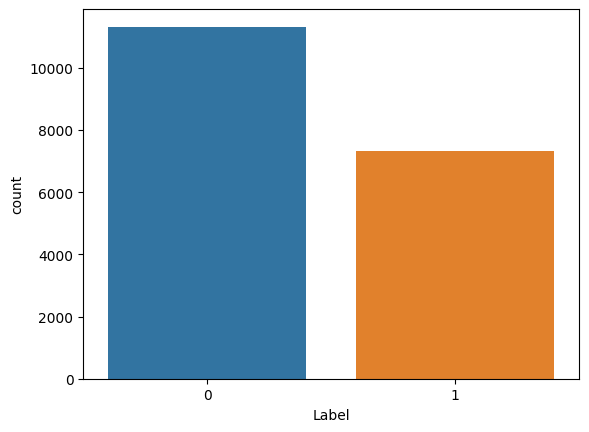

In [8]:
sns.countplot(x='Label', data=df_combined)
plt.show()

Not imbalanced enough to require over or under sampling

### Clean up unneeded words and punctuation

In [9]:
# remove blanks
df_combined = df_combined.dropna()

#  remove the word "Subject" from every email

df_combined['Body'] = df_combined['Body'].str.replace('Subject', '')

# remove punctuation
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df_sa['Body']= df_combined['Body'].apply(lambda x: remove_punctuations(x))

# remove "stopwords"
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df_combined['Body'] = df_combined['Body'].apply(lambda text: remove_stopwords(text))
df_combined.head()


# check cleanup results
df_combined.head()


ValueError: cannot reindex on an axis with duplicate labels

### Make wordclouds

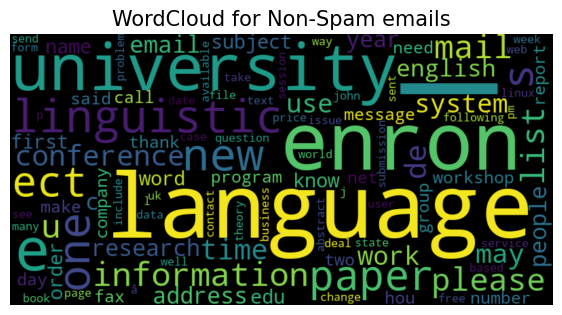

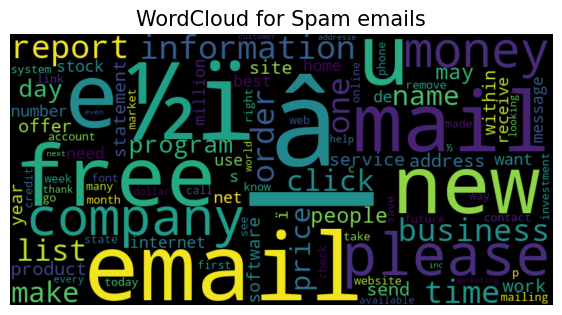

In [ ]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['Body'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
 
plot_word_cloud(df_combined[df_combined['Label'] == 0], typ='Non-Spam')
plot_word_cloud(df_combined[df_combined['Label'] == 1], typ='Spam')


### Split Data

In [13]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(df_combined['Body'].to_numpy(),
													df_combined['Label'].to_numpy(),
													test_size = 0.2,
													random_state = 42)


### Create model

In [24]:
model = ak.TextClassifier(max_trials=5)
cbs = [tf.keras.callbacks.EarlyStopping(patience=5)]

### Train Model

In [27]:
# Train the model
history = model.fit(X_train, Y_train, callbacks = cbs)


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/2
266/467 [================>.............] - ETA: 27s - loss: 0.3170 - accuracy: 0.8396

KeyboardInterrupt: 

### Check accuraccy

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



NotFoundError: NewRandomAccessFile failed to Create/Open: .\text_classifier\best_pipeline : The system cannot find the file specified.
; No such file or directory